In [44]:
!pip install sklearn

  Stored in directory: C:\Users\Administrator\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [45]:
%matplotlib inline

In [46]:
import numpy as np

In [47]:
random_data = np.random.random((20, 2))

In [48]:
random_data

array([[0.73809332, 0.10227724],
       [0.49275198, 0.12891189],
       [0.62854845, 0.37595189],
       [0.7709408 , 0.15476334],
       [0.90073677, 0.56728099],
       [0.51904753, 0.77493461],
       [0.99634136, 0.7383026 ],
       [0.86332927, 0.02286471],
       [0.74765785, 0.37888752],
       [0.45378872, 0.35882426],
       [0.9578673 , 0.18099627],
       [0.61016226, 0.66263579],
       [0.5084412 , 0.97934241],
       [0.94680038, 0.10121926],
       [0.13914563, 0.2264028 ],
       [0.62830303, 0.1079369 ],
       [0.80643694, 0.97248342],
       [0.51388186, 0.59278109],
       [0.80360915, 0.29956097],
       [0.22064445, 0.01240332]])

In [49]:
import matplotlib.pyplot as plt

In [54]:
X = random_data[:, 0]

In [55]:
y = random_data[:, 1]

In [58]:
import random

In [59]:
def assmuing_function(x):
    # 体重 -> 高血压的概率
    # 收入 -> 买阿玛尼的概率
    # 其实都是一种潜在的函数关系 + 一个随机变化
    return 13.4 * x + 5 + random.randint(-5, 5)

In [61]:
y = [assmuing_function(x) for x in X]

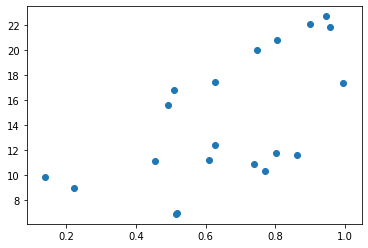

In [63]:
plt.scatter(X, y)

In [64]:
y = np.array(y)

In [65]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [66]:
reg = LinearRegression().fit(X.reshape(-1, 1), y)

In [67]:
reg.score(X.reshape(-1, 1), y)

0.3805494604363726

In [68]:
reg.coef_

array([13.58501342])

In [69]:
reg.intercept_

5.327460722127682

In [73]:
def f(x): 
    return reg.coef_ * x + reg.intercept_

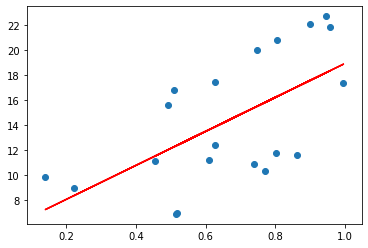

In [74]:
plt.scatter(X, y)
plt.plot(X, f(X), color='red')

###实现KNN模型

In [75]:
def model(X, y):
    return [(Xi, yi) for Xi, yi in zip(X, y)]

In [76]:
from scipy.spatial.distance import cosine

In [77]:
def distance(x1, x2):
    return cosine(x1, x2)

In [79]:
def predict(x, k=5):
    most_similars = sorted(model(X, y), key=lambda xi: distance(xi[0], x))[:k]
    # 已经获得了最相似的数据集
    # 然后呢，Counter() -> most_common() -> 就可以获得出现最多的这个y了

In [ ]:
###实现决策树

In [83]:
from collections import Counter

In [84]:
def entropy(elements):
    '''熵指的是群体的混乱程度'''
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    return - sum(p * np.log(p) for p in probs)

In [85]:
entropy([1,1,1,1])


-0.0

In [86]:
entropy([1,1,1,0])

0.5623351446188083

In [88]:
entropy([1,2,3,4])

1.3862943611198906

In [89]:
entropy([1,2,3,3])

1.0397207708399179

##决策树怎么样来决定，哪一个特征来进行分割

In [90]:
mock_data = {
    'gender' : ['F','F','F','F','M','M','M'],
    'income' : ['+10','-10','+10','+10','+10','+10','-10'],
    'family_number' : [1,1,2,1,1,1,2],
    'bought' : [1,1,1,0,0,0,1],   
}

In [91]:
import  pandas as pd

In [92]:
dataset = pd.DataFrame.from_dict(mock_data)

In [93]:
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


##决策树在选择决策过程，决策顺序的时候，其实是按照根据数据特征进行分割之后，数据的熵最少原则进行的

In [94]:
set(mock_data['family_number'])

{1, 2}

In [95]:
sub_split_1 = dataset[dataset['family_number'] == 1]['bought'].tolist()

In [96]:
sub_split_1

[1, 1, 0, 0, 0]

In [97]:
sub_split_2 = dataset[dataset['family_number'] != 1]['bought'].tolist()

In [98]:
entropy(sub_split_1) + entropy(sub_split_2)

0.6730116670092565

In [99]:
sub_split_2

[1, 1]

In [100]:
_sub_split_2 = dataset[dataset['gender'] != 'M']['bought'].tolist()

In [101]:
_sub_split_1 = dataset[dataset['gender'] != 'F']['bought'].tolist()

In [102]:
_sub_split_1

[0, 0, 1]

In [103]:
_sub_split_2

[1, 1, 1, 0]

In [104]:
entropy(_sub_split_1) + entropy(_sub_split_2)

1.198849312913621

In [105]:
dataset.columns.tolist()

['gender', 'income', 'family_number', 'bought']

In [110]:
from icecream import ic

ModuleNotFoundError: No module named 'icecream'

In [111]:
def find_the_min_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            ic(sub_split_1)
            entropy_1 = entropy(sub_spliter_1)
            ic(entropy_1)
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            ic(sub_split_2)
            entropy_2 = entropy(sub_spliter_2)
            ic(entropy_2)
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    
    return spliter

In [112]:
find_the_min_spilter(dataset, 'bought')

NameError: name 'ic' is not defined

In [113]:
dataset[dataset['family_number'] == 2]

,gender,income,family_number,bought
2,F,+10,2,1
6,M,-10,2,1


In [114]:
dataset[dataset['family_number'] == 1]

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [115]:
find_the_min_spilter(dataset[dataset['family_number'] == 1], 'bought')

NameError: name 'ic' is not defined

In [116]:
sub_df = dataset[dataset['family_number'] == 1]

In [117]:
sub_df[sub_df['gender'] == 'M']

,gender,income,family_number,bought
4,M,+10,1,0
5,M,+10,1,0


In [118]:
sub_df[sub_df['gender'] != 'M']

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0


In [119]:
find_the_min_spilter(sub_df[sub_df['gender'] != 'M'], 'bought')

NameError: name 'ic' is not defined

# #kmeans的简单例子

In [120]:
from sklearn.cluster import KMeans

In [121]:
X = [random.randint(0, 100) for _ in range(100)]
Y = [random.randint(0, 100) for _ in range(100)]

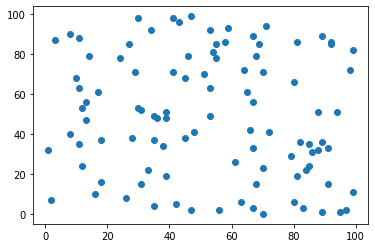

In [122]:
plt.scatter(X, Y)

In [123]:
tranning_data = [[x, y] for x, y in zip(X, Y)]

In [124]:
cluster = KMeans(n_clusters=6, max_iter=500)

In [125]:
cluster.fit(tranning_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [126]:
cluster.cluster_centers_

array([[56.45454545, 80.27272727],
       [80.30769231, 20.19230769],
       [27.5       , 44.95      ],
       [90.33333333, 74.22222222],
       [29.75      , 11.16666667],
       [18.27272727, 81.72727273]])

In [127]:
cluster.labels_

array([2, 3, 1, 1, 2, 2, 1, 4, 2, 5, 5, 1, 4, 2, 4, 1, 3, 3, 1, 2, 4, 5,
       0, 4, 2, 2, 0, 4, 2, 0, 2, 5, 1, 4, 5, 1, 1, 4, 0, 1, 0, 1, 2, 2,
       4, 0, 0, 0, 5, 2, 1, 1, 2, 1, 0, 0, 0, 0, 0, 3, 4, 4, 2, 0, 1, 1,
       0, 1, 2, 5, 3, 1, 0, 0, 1, 5, 4, 3, 3, 2, 1, 0, 5, 1, 5, 0, 1, 1,
       0, 2, 5, 1, 2, 0, 3, 0, 2, 3, 1, 1])

In [128]:
from collections import defaultdict

In [129]:
centers = defaultdict(list)

In [130]:
for label, location in zip(cluster.labels_, tranning_data):
    centers[label].append(location)

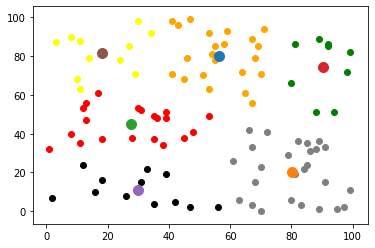

In [131]:
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])
        
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)

# 问答


In [ ]:
 What's the model? why all the models are wrong, but some are useful?

In [ ]:
通过主观意识借助实体或者虚拟表现构成客观阐述形态结构的一种表达目的的物件

In [ ]:
Remember that all models are wrong; the practical question is how wrong do they have to be to not be useful  
大多数模型都具有不一样类型的拟合或误差的度量。根据所使用的建模的类型，可以有不同的拟合方式和误差
模型就是对实际事物的一个抽象，但事实上，实际事物的影响因素是多种多样的，一个数学模型只可能考虑其中的一部分影响因素而不是全部，但事物的发展有时却的确由不显著因素影响，数学模型与事物实际的规律还是有很大差异的，即所谓错误的。但是，由于数学模型往往抓住的和考虑的是对事物发展影响最为显著的一些因素，所以，数学模型抓住了事物发展的主要矛盾和主要规律，从这个意义上讲，数学模型还是有用滴。

In [ ]:
What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting

In [ ]:
拟合的函数和训练集误差较大，就是欠拟合
拟合的函数完美的匹配训练集数据，就是过拟合

In [ ]:
欠拟合原因：

    模型复杂度过低
    特征量过少
解决方法：
1.增加新特征，可以考虑加入进特征组合、高次特征，来增大假设空间
2.添加多项式特征，这个在机器学习算法里面用的很普遍，例如将线性模型通过添加二次项或者三次项使模型泛化能力更强
3.减少正则化参数，正则化的目的是用来防止过拟合的，但是模型出现了欠拟合，则需要减少正则化参数
4.使用非线性模型，比如核SVM 、决策树、深度学习等模型
5.调整模型的容量(capacity)，通俗地，模型的容量是指其拟合各种函数的能力
6.容量低的模型可能很难拟合训练集；使用集成学习方法，如Bagging ,将多个弱学习器Bagging



In [ ]:
过拟合原因：
1.建模样本选取有误，如样本数量太少，选样方法错误，样本标签错误等，导致选取的样本数据不足以代表预定的分类规则
2.样本噪音干扰过大，使得机器将部分噪音认为是特征从而扰乱了预设的分类规则
3.假设的模型无法合理存在，或者说是假设成立的条件实际并不成立
4.参数太多，模型复杂度过高
5.对于决策树模型，如果我们对于其生长没有合理的限制，其自由生长有可能使节点只包含单纯的事件数据(event)或非事件数据(no event)，使其虽然可以完美匹配（拟合）训练数据，但是无法适应其他数据集
6.对于神经网络模型：a)对样本数据可能存在分类决策面不唯一，随着学习的进行,，BP算法使权值可能收敛过于复杂的决策面；b)权值学习迭代次数足够多(Overtraining)，拟合了训练数据中的噪声和训练样例中没有代表性的特征
解决方法：

    正则化（Regularization）（L1和L2）
    数据扩增，即增加训练数据样本
    Dropout
    Early stopping


In [ ]:
 What's the precision, recall, AUC, F1, F2score. What are they mainly target on

In [ ]:
precision是最常用最基本的评价指标，但在二元分类且正反例不平衡的情况下，没什么用
recall是相对真实的答案而言，你的模型预测到的值占真实值的比例
F1-score 就是一个综合考虑precision和recall的标准
综合考虑Precision和Recall的调和值
当 beta =1时，成为F1-Score，这时召回率和精确率都很重要，权重相同
我们认为召回率更加重要，那就调整 β的值大于1，就是F2-Score
AUC只能用于二分类模型的评估，AUC即ROC曲线下的面积，而ROC曲线的横轴是FPRate，纵轴是TPRate

In [ ]:
Based on our course and yourself mind, what's the machine learning

In [ ]:
让机器学习是从数据中提取知识，是统计学、人工智能和计算机科学的交叉领域，也被称为预测分析或统计学习

In [ ]:
正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的

In [ ]:
机器学习过程包括两个阶段：原型设计阶段（Prototyping）与应用阶段（Deployed）
这两个阶段使用的数据集也不一样，分别是历史数据（historical data）与新数据（live data）
在机器学习中，很多模型都是假设数据的分布是一定的，不变的，即历史数据与将来的数据都服从相同的分布。但是，在现实生活中，这种假设往往是不成立的，即数据的分布会随着时间的移动而改变，有时甚至变化得很急剧，这种现象称为分布漂移（Distribution Drift）
不同的机器学习任务有着不同的性能评价指标
所以原型阶段中最重要的任务便是选择一个正确的适合的模型对数据进行拟合

